In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [30]:
df = pd.read_csv("Life Expectancy Data.csv")
df.head(15)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [31]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [32]:
df.shape

(2938, 22)

In [33]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [34]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [36]:
country_list = df.Country.unique()
fill_list = ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B','Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure','Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [37]:
for country in country_list:
    df.loc[df['Country'] == country,fill_list] = df.loc[df['Country'] == country,fill_list].interpolate()
df.dropna(inplace=True)

In [38]:
df.shape

(1987, 22)

In [39]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

<AxesSubplot:xlabel='Status', ylabel='count'>

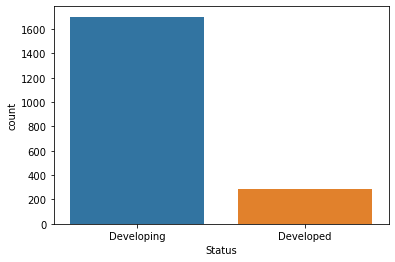

In [40]:
sns.countplot(x='Status',data=df)

In [41]:
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)


col_dict = {'Life_Expectancy':1 , 'Adult_Mortality':2 ,
        'Alcohol':3 , 'Percentage_Exp': 4, 'HepatitisB': 5,
       'Measles' : 6, 'BMI': 7, 'Under_Five_Deaths' : 8, 'Polio' : 9, 'Tot_Exp' :10,
       'Diphtheria':11, 'HIV/AIDS':12, 'GDP':13, 'Population' :14,
       'thinness_1to19_years' :15, 'thinness_5to9_years' :16,
       'Income_Comp_Of_Resources' : 17, 'Schooling' :18, 'Infant_Deaths':19}

In [42]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers in {} : {} ".format(variable,len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))))

Number of outliers in Life_Expectancy : 4 
Number of outliers in Adult_Mortality : 58 
Number of outliers in Alcohol : 3 
Number of outliers in Percentage_Exp : 232 
Number of outliers in HepatitisB : 216 
Number of outliers in Measles : 361 
Number of outliers in BMI : 0 
Number of outliers in Under_Five_Deaths : 227 
Number of outliers in Polio : 159 
Number of outliers in Tot_Exp : 13 
Number of outliers in Diphtheria : 195 
Number of outliers in HIV/AIDS : 309 
Number of outliers in GDP : 244 
Number of outliers in Population : 260 
Number of outliers in thinness_1to19_years : 70 
Number of outliers in thinness_5to9_years : 75 
Number of outliers in Income_Comp_Of_Resources : 91 
Number of outliers in Schooling : 32 
Number of outliers in Infant_Deaths : 198 


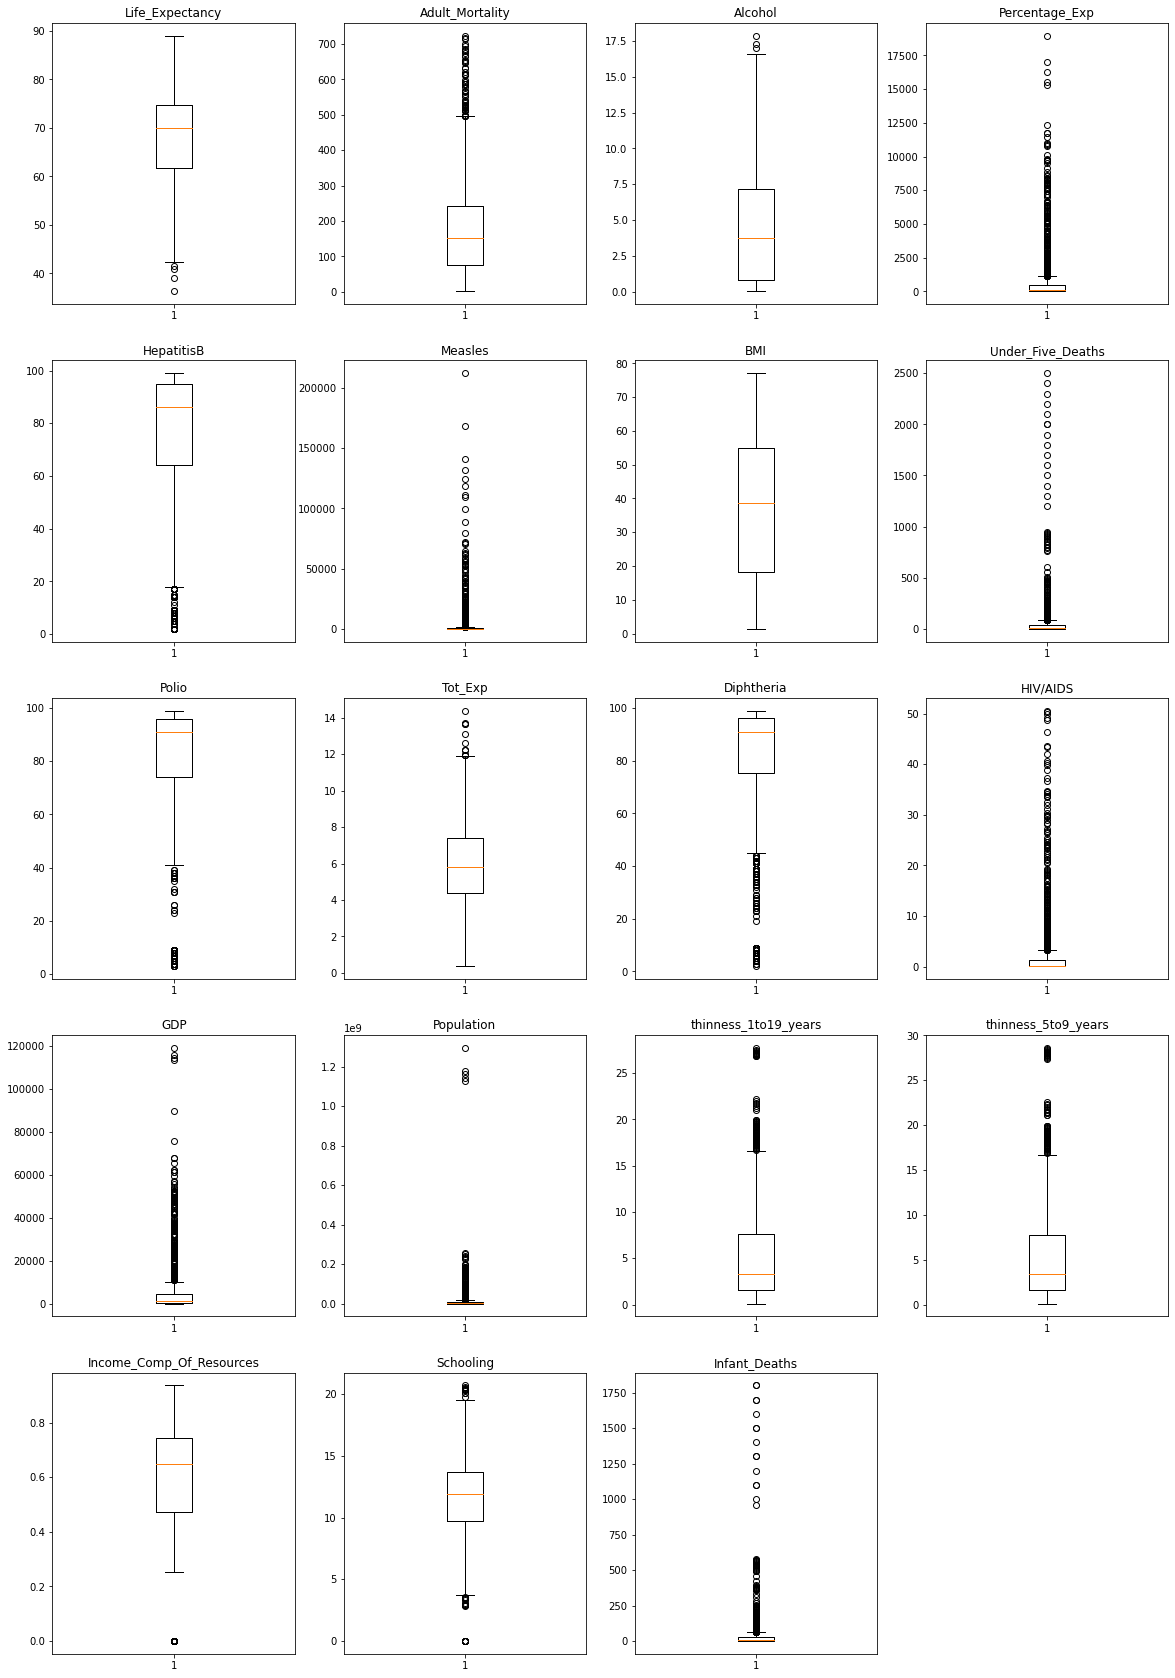

In [43]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

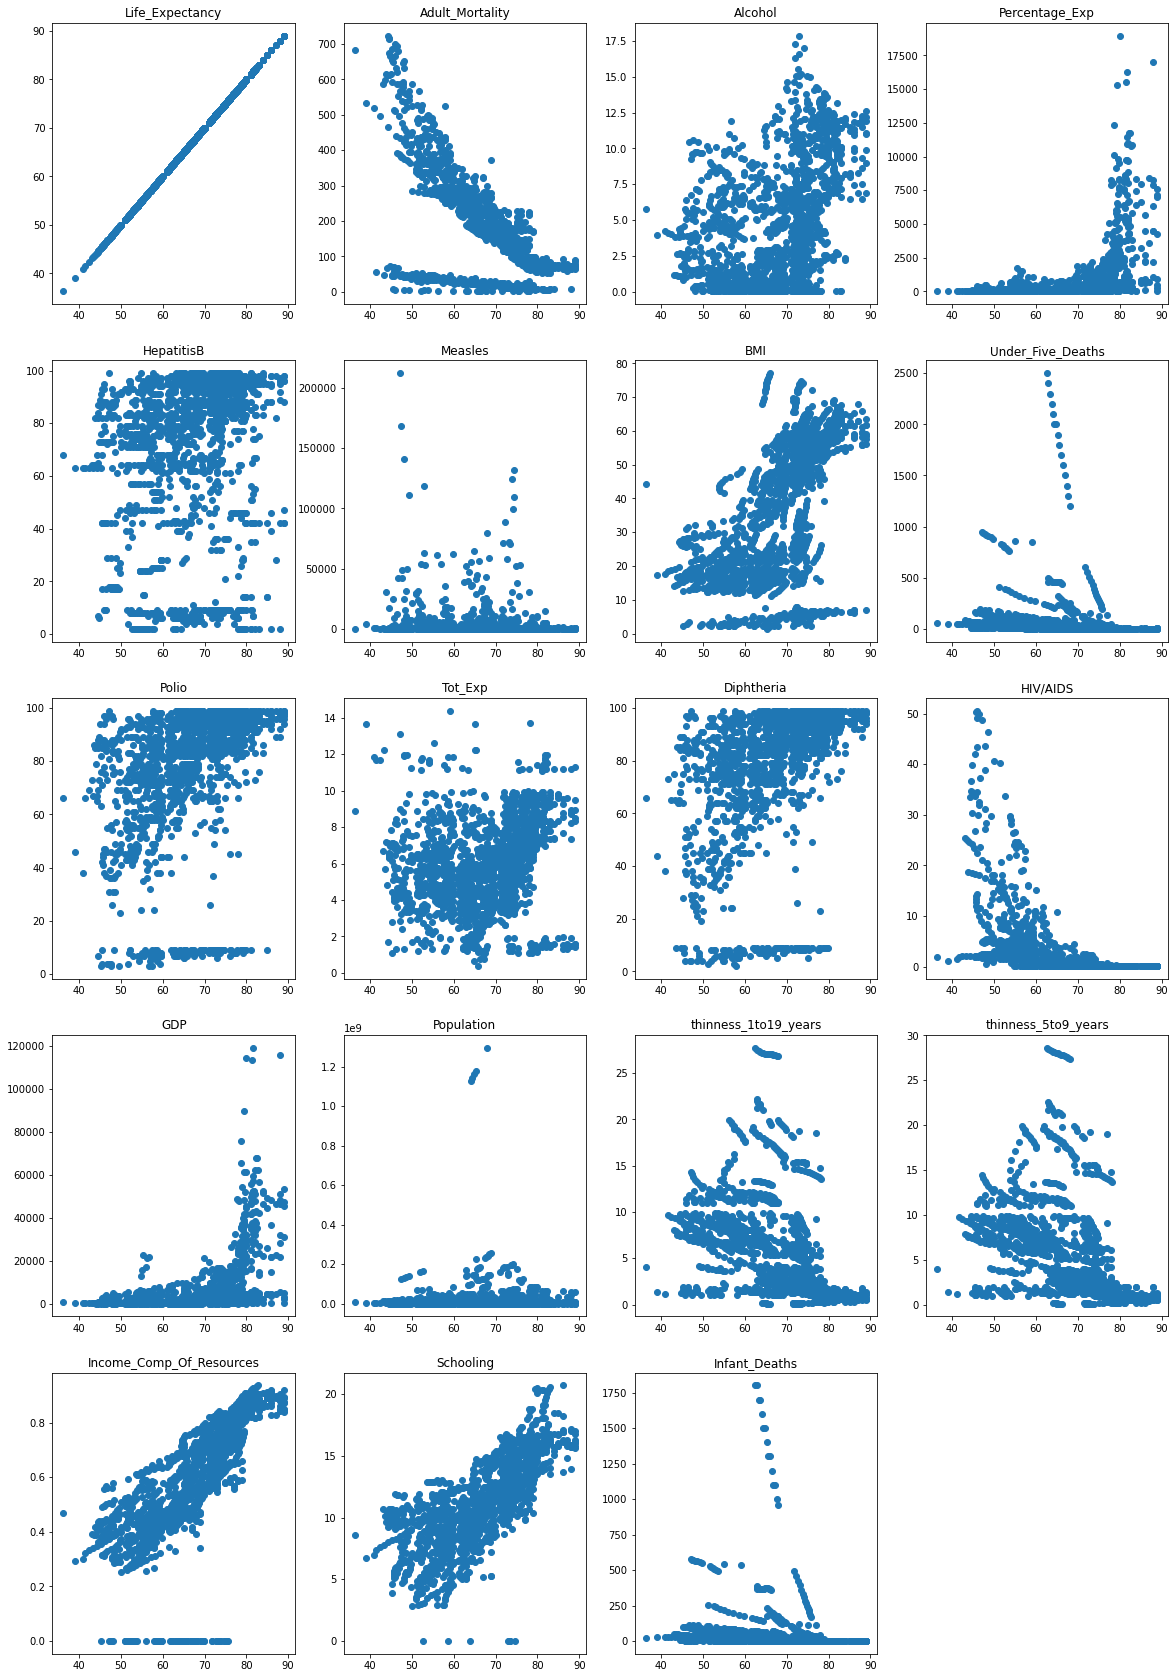

In [44]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.scatter(df["Life_Expectancy"], df[variable])
                     plt.title(variable)

plt.show()

In [45]:
winsorize(df["Life_Expectancy"],(0.01,0), inplace=True)
winsorize(df["Adult_Mortality"],(0,0.03), inplace=True)
winsorize(df["Infant_Deaths"],(0,0.10), inplace=True)
winsorize(df["Alcohol"],(0,0.01), inplace=True)
winsorize(df["Percentage_Exp"],(0,0.12), inplace=True)
winsorize(df["HepatitisB"],(0.11,0), inplace=True)
winsorize(df["Measles"],(0,0.19), inplace=True)
winsorize(df["Under_Five_Deaths"],(0,0.12), inplace=True)
winsorize(df["Polio"],(0.09,0), inplace=True)
winsorize(df["Tot_Exp"],(0,0.01), inplace=True)
winsorize(df["Diphtheria"],(0.10,0), inplace=True)
winsorize(df["HIV/AIDS"],(0,0.16), inplace=True)
winsorize(df["GDP"],(0,0.13), inplace=True)
winsorize(df["Population"],(0,0.14), inplace=True)
winsorize(df["thinness_1to19_years"],(0,0.04), inplace=True)
winsorize(df["thinness_5to9_years"],(0,0.04), inplace=True)
winsorize(df["Income_Comp_Of_Resources"],(0.05,0), inplace=True)
winsorize(df["Schooling"],(0.02,0.01), inplace=True)

masked_array(data=[10.1, 10. ,  9.9, ..., 10. ,  9.8,  9.8],
             mask=False,
       fill_value=1e+20)

In [46]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(df[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers in {} : {} ".format(variable,len((np.where((df[variable] > max_val) | (df[variable] < min_val))[0]))))

Number of outliers in Life_Expectancy : 0 
Number of outliers in Adult_Mortality : 0 
Number of outliers in Alcohol : 0 
Number of outliers in Percentage_Exp : 0 
Number of outliers in HepatitisB : 0 
Number of outliers in Measles : 0 
Number of outliers in BMI : 0 
Number of outliers in Under_Five_Deaths : 0 
Number of outliers in Polio : 0 
Number of outliers in Tot_Exp : 0 
Number of outliers in Diphtheria : 0 
Number of outliers in HIV/AIDS : 0 
Number of outliers in GDP : 0 
Number of outliers in Population : 0 
Number of outliers in thinness_1to19_years : 0 
Number of outliers in thinness_5to9_years : 0 
Number of outliers in Income_Comp_Of_Resources : 0 
Number of outliers in Schooling : 0 
Number of outliers in Infant_Deaths : 0 


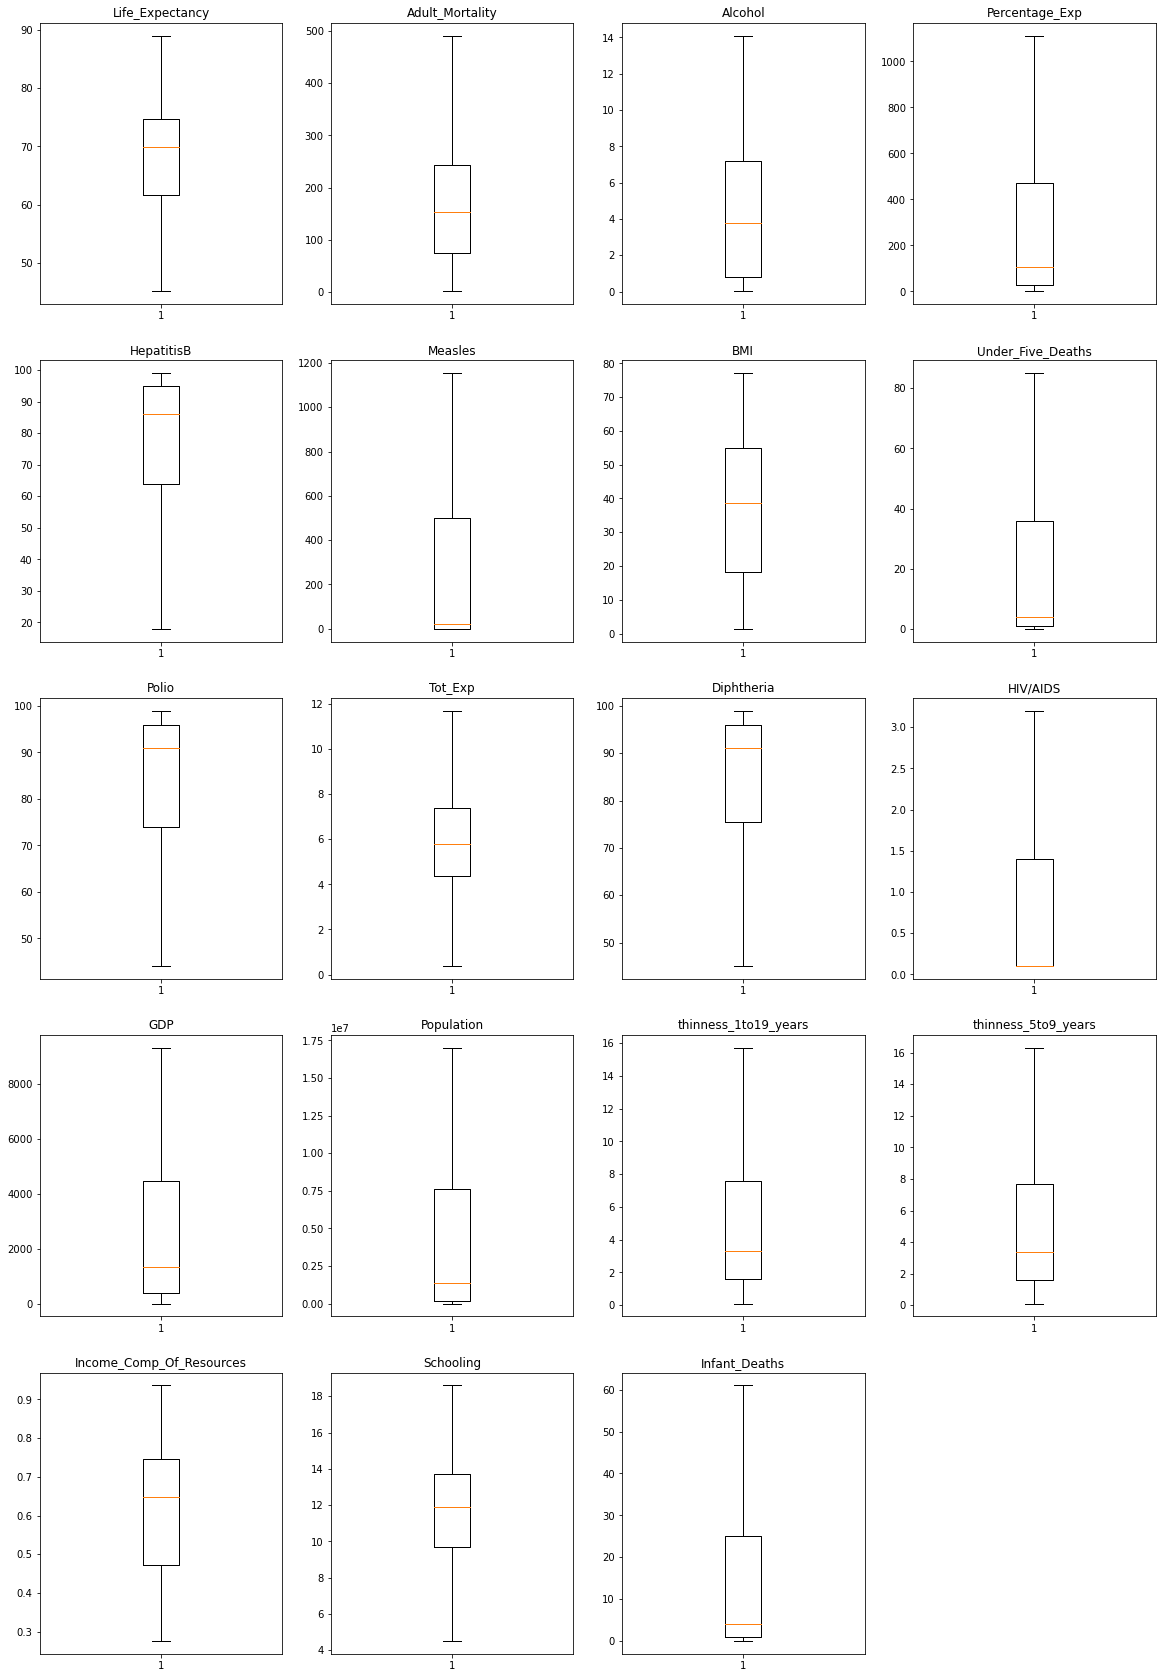

In [47]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

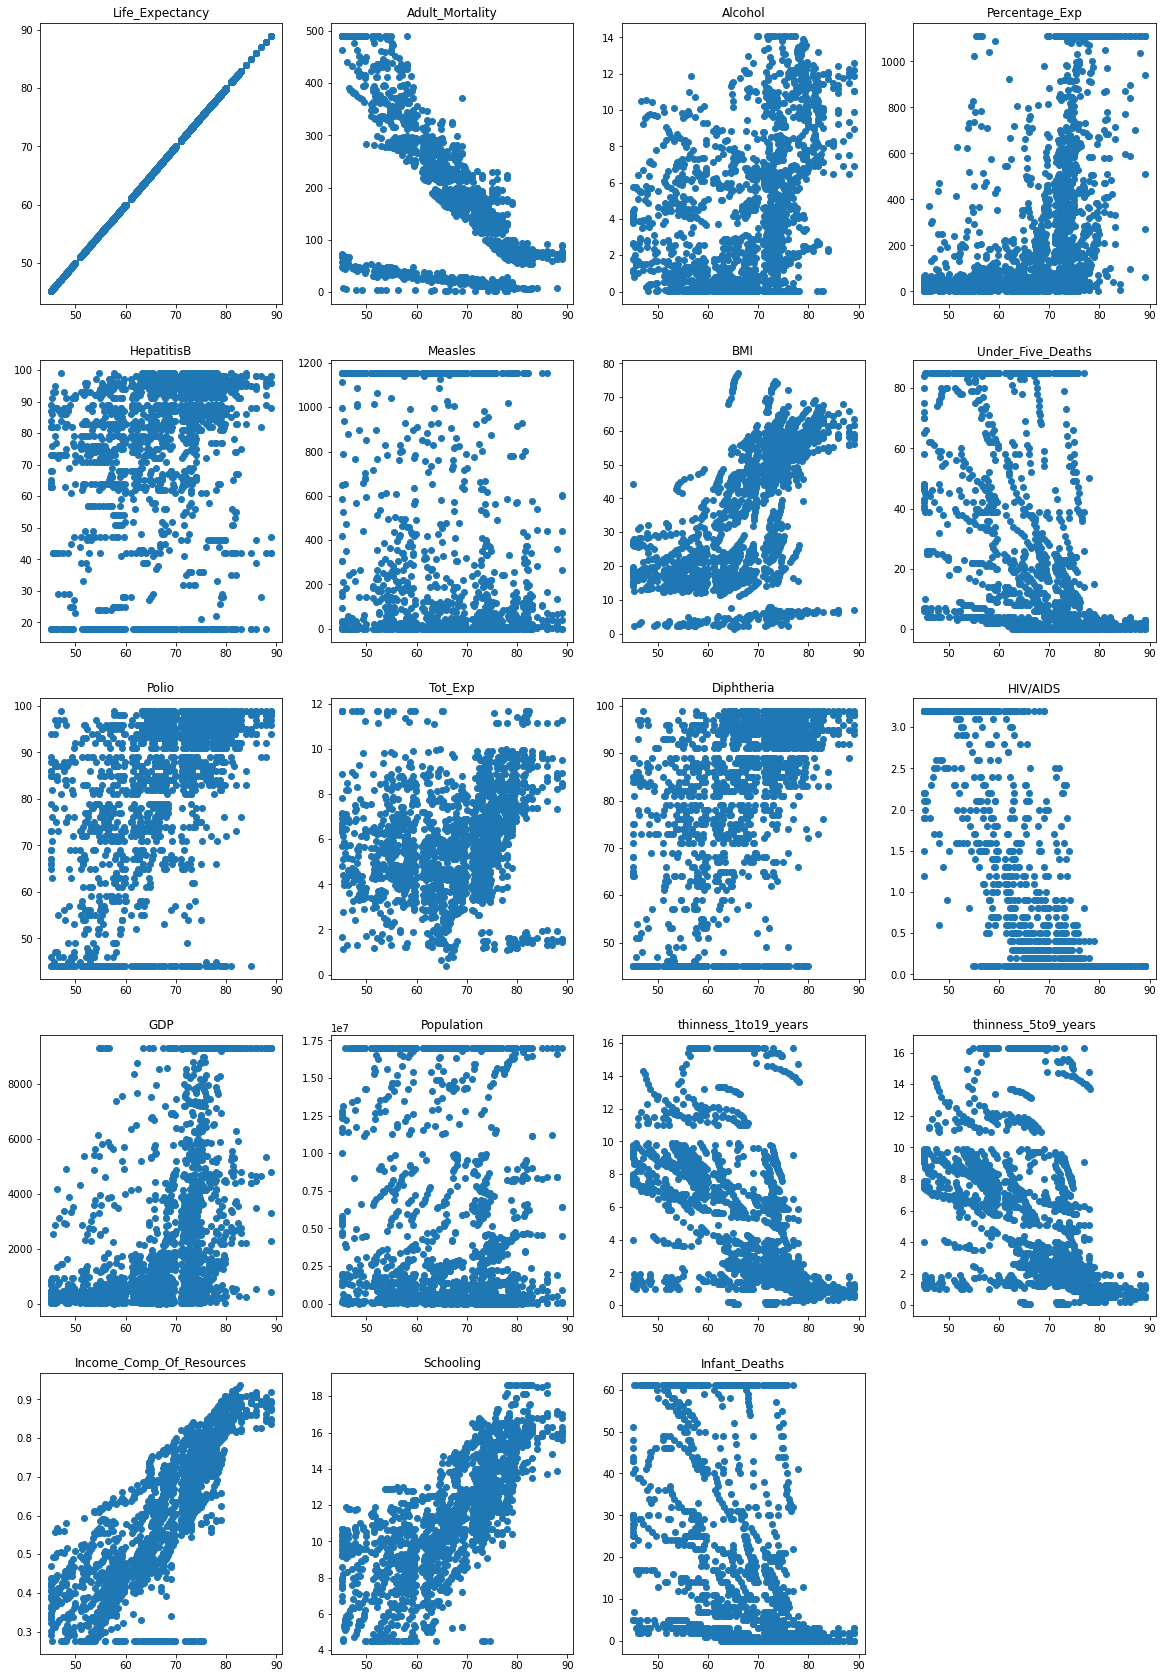

In [48]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.scatter(df["Life_Expectancy"], df[variable])
                     plt.title(variable)

plt.show()

In [49]:
data=df.drop(columns=['Country','Status'])
data

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,2015,65.0,263.0,61,0.01,71.279624,65.0,1154,19.1,83,44.0,8.16,65.0,0.1,584.259210,16993354.0,15.7,16.3,0.479,10.1
1,2014,59.9,271.0,61,0.01,73.523582,62.0,492,18.6,85,58.0,8.18,62.0,0.1,612.696514,327582.0,15.7,16.3,0.476,10.0
2,2013,59.9,268.0,61,0.01,73.219243,64.0,430,18.1,85,62.0,8.13,64.0,0.1,631.744976,16993354.0,15.7,16.3,0.470,9.9
3,2012,59.5,272.0,61,0.01,78.184215,67.0,1154,17.6,85,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.7,16.3,0.463,9.8
4,2011,59.2,275.0,61,0.01,7.097109,68.0,1154,17.2,85,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.7,16.3,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,45.1,491.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,3.2,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,45.1,491.0,26,4.06,0.000000,18.0,998,26.7,41,44.0,6.52,68.0,3.2,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,45.1,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,3.2,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,491.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,3.2,548.587312,12366165.0,1.6,1.7,0.427,9.8


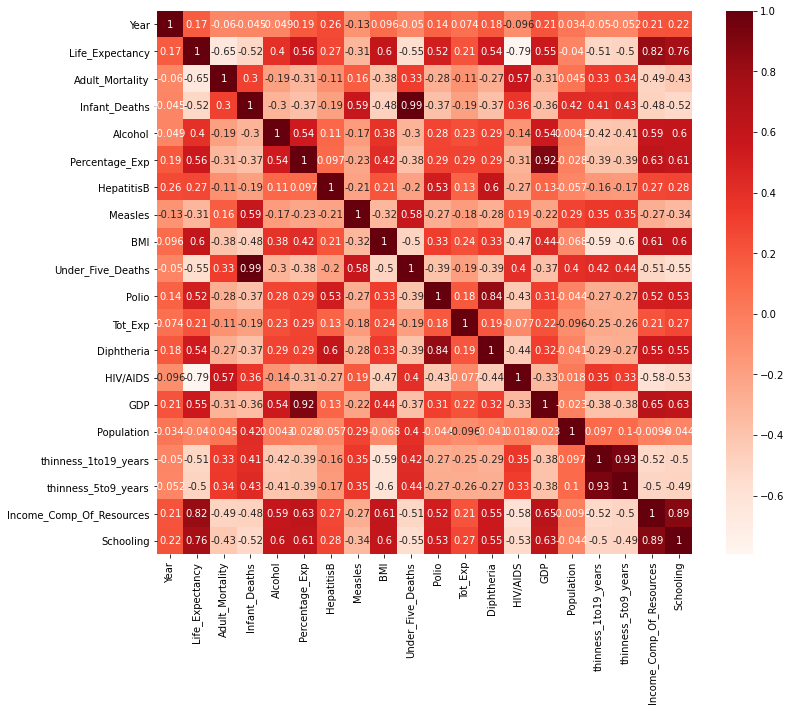

In [50]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [59]:
#Correlation with output variable
cor_target = abs(cor["Life_Expectancy"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values(ascending=False)

Life_Expectancy             1.000000
Income_Comp_Of_Resources    0.823222
HIV/AIDS                    0.793696
Schooling                   0.762333
Adult_Mortality             0.654255
BMI                         0.601434
Percentage_Exp              0.557117
Under_Five_Deaths           0.552035
GDP                         0.551722
Diphtheria                  0.535687
Infant_Deaths               0.516494
Polio                       0.516167
thinness_1to19_years        0.507870
Name: Life_Expectancy, dtype: float64

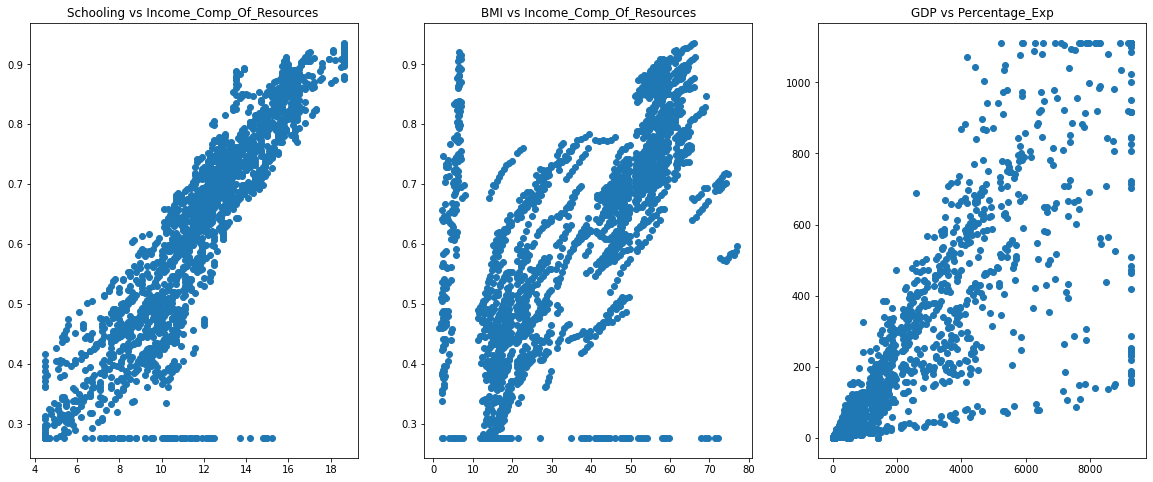

In [83]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
plt.scatter(df["Schooling"], df["Income_Comp_Of_Resources"])
plt.title("Schooling vs Income_Comp_Of_Resources ")

plt.subplot(1,3,2)
plt.scatter(df["BMI"], df["Income_Comp_Of_Resources"])
plt.title("BMI vs Income_Comp_Of_Resources")

plt.subplot(1,3,3)
plt.scatter(df["GDP"], df["Percentage_Exp"])
plt.title("GDP vs Percentage_Exp")

plt.show()

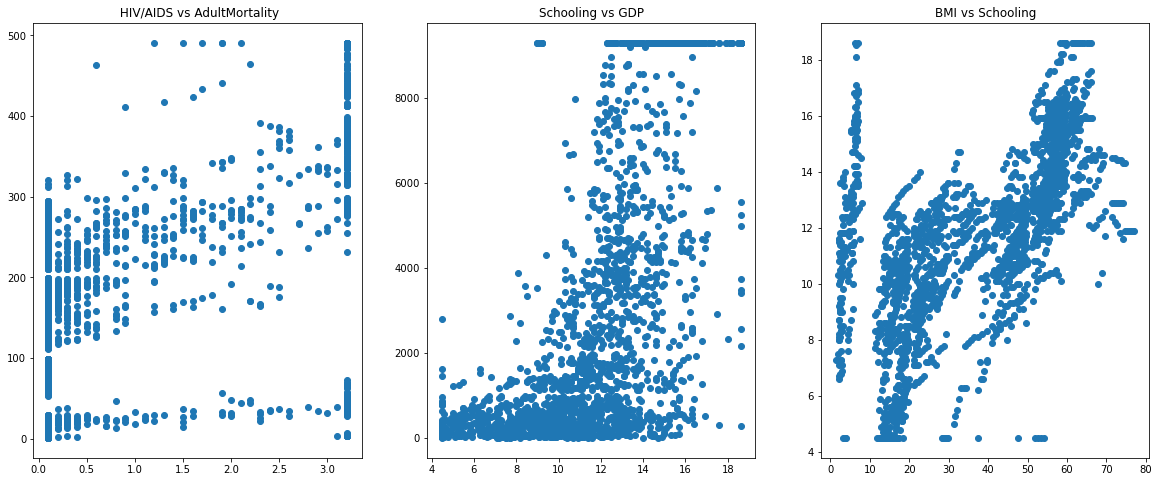

In [82]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
plt.scatter(df["HIV/AIDS"], df["Adult_Mortality"])
plt.title(" HIV/AIDS vs AdultMortality")

plt.subplot(1,3,2)
plt.scatter(df["Schooling"], df["GDP"])
plt.title("Schooling vs GDP")

plt.subplot(1,3,3)
plt.scatter(df["BMI"], df["Schooling"])
plt.title("BMI vs Schooling")
plt.show()

In [62]:
round(df[['Status','Life_Expectancy']].groupby(['Status']).mean(),2)

,Life_Expectancy
Status,
Developed,78.83
Developing,66.19


In [63]:
import scipy.stats as stats
stats.ttest_ind(df.loc[df['Status']=='Developed','Life_Expectancy'],df.loc[df['Status']=='Developing','Life_Expectancy'])

Ttest_indResult(statistic=23.02232052151534, pvalue=3.793119218299665e-104)

In [64]:
repl={"Status":{"Developing":0,"Developed":1}}
df.replace(repl, inplace=True)

In [65]:
X = df[['Status','Schooling','Income_Comp_Of_Resources','HIV/AIDS','Adult_Mortality','BMI','Percentage_Exp','GDP']]
#X = df.drop(cols, axis = 1 )
Y = df['Life_Expectancy']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)
model = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, Y_train)
predictions= model.predict(X_test)

In [66]:
r2_score(predictions, Y_test)

0.8323510149094899

In [67]:
mean_squared_error(predictions, Y_test)

13.04000239624943

In [68]:
mean_absolute_error(predictions, Y_test)

2.6717219997572066

In [69]:
print('Accuracy is',model.score(X_test,Y_test)*100,'%')

Accuracy is 86.27842988075552 %


In [70]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
rfr_score=rfr.score(X_test,Y_test) 
rfr_rmse = rmse(Y_test, rfr.predict(X_test))
rfr_score, rfr_rmse

(0.9608713434893073, 1.9283435043721506)

In [71]:
print("Status \n Developing: Enter 0 \n Developed: Enter 1")
St=float(input())
S=float((input("Schooling: ")))
I=float(input("Income Comp of Resources: "))
H=float(input("HIV/AIDS: "))
A=float(input("Adult Mortality: "))
BM=float(input("BMI: "))
PE=float(input("Percentage_Exp: "))
GD=float(input("GDP: "))


Status 
 Developing: Enter 0 
 Developed: Enter 1
0
Schooling: 8.4
Income Comp of Resources: 0.415
HIV/AIDS: 0.1
Adult Mortality: 295
BMI: 15.2
Percentage_Exp: 10.910
GDP: 369.38


In [75]:
print("Predicted Life Expectancy: ", rfr.predict([[St,S,I,H,A,BM,PE,GD]]))

Predicted Life Expectancy:  [57.707]
